# Notebook for plotting some simulation results

Importing the necessary packages for plotting

In [1]:
import os
import yaml
import numpy as np
import matplotlib.pyplot as plt

# Setting size of the fonts in the figure to 16
plt.rcParams.update({
    "font.size" : 16,
    })

Specify the configurations of the simulation

In [2]:
nz = 2000
nvz = 64
cfl = 0.4

ID = f"{nz}_{nvz}_{cfl}" 

Looking for the configuration file in the job folder and lading them if exists

In [3]:
data_folder = os.path.join(
    "../",
    "output_from_fv",
    ID,
)

with open (os.path.join(data_folder, "job.config"), "r") as f:
    configs = yaml.load(f, Loader=yaml.FullLoader)

Creating the folder to save the plots if does not exist already.

In [4]:
save_plots_at = os.path.join(
    "./", 
    ID,
)

if not os.path.exists(save_plots_at):
    os.makedirs(save_plots_at)

Replicating the grid and bins according to the configuration for plotting.

In [5]:
dz = (configs['z1'] - configs['z0']) / nz
dt = cfl * dz 
dvz = (configs['v1'] - configs['v0']) / nvz

z = configs['z0'] + (np.arange(nz) + 0.5) * dz 
vz = configs['v0'] + (np.arange(nvz) + 0.5) * dvz

Loding the conserved quantities data from the data_folder as ```numpy array```

In [6]:
Dconserved_qty = np.genfromtxt(
    os.path.join(data_folder, f"{ID}_conserved_quantities.dat")
)

Plotting $\delta P_{max}$, $\langle\delta P\rangle$ and $\langle\delta\bar P\rangle$

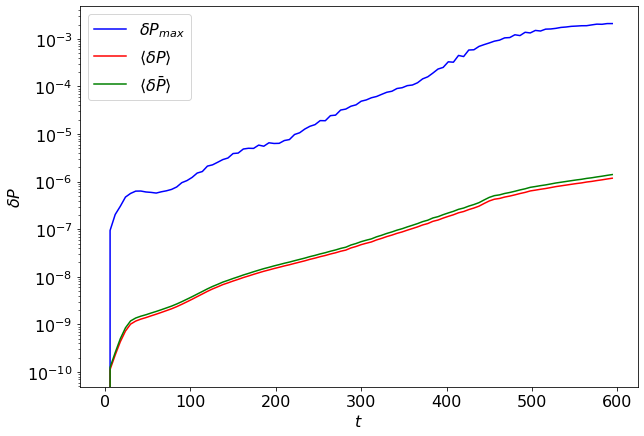

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.subplots()

t = Dconserved_qty[:, 0]*dt # Slicing the iteration data and multiplying with dt to get physical time
dP = Dconserved_qty[:, 1] # Slicing dP_max data
dP_avg = Dconserved_qty[:, 2] # Slicing average dP data
dbP_avg = Dconserved_qty[:,3] # Same as the above, but for dP-bar

ax.plot(t, dP, color = 'blue', label = r"$\delta P_{max}$") # Plotting dP_max as a function of physical time.
ax.plot(t, dP_avg, color = 'red', label = r"$\langle\delta P\rangle$") # Same as above for dP_avg
ax.plot(t, dbP_avg, color = 'green', label = r"$\langle\delta\bar P\rangle$") # ... 
ax.set_yscale('log') # Setting logarithmic scale for y-axis of the plot

ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$\delta P$')

ax.legend()

plt.show()

In [ ]:

survival_probability = np.genfromtxt(
    os.path.join(data_folder, f"{ID}_survival_probability.dat")